# Notebook "5_bis_Besoin_2_Classification_EPA_Emission_vs_BDF"


## Description

Ce notebook est en complément de "5_Besoin_2_Classification_EPA_Emission_vs_BDF". Celui-ci se focalise sur d'autres classifieurs comme les arbres de décision.

## Structure du notebook

Ce notebook est construit de plusieurs parties :
- I. Import des bibliothèques
- II. Chargement des données
- III. Classification avec toutes les variables
- IV. Séparation 
- V. Classifications

## Prérequis

### Source de données

Pour que le notebook fonctionne, la base de données EPA "Emission" normalisé doit être disponible dans le même fichier que le notebook. Par ailleurs, cette source doit être au format csv avec le nom "DB_EPA_merge_normalized.csv"

### Installation des prérequis techniques

Le notebook fonctionne sur Python 3.7 avec les bibliothèques suivantes :
- pandas
- seaborn
- matplotlib
- numpy
- scipy
- sklearn

# I. Import des bibiothèques

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pandas.io.sql as sqlio

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# II. Mise en place des données

## II.a Chargement des données

In [2]:
data = pd.read_csv('DB_EPA_merge_normalized.csv', sep=';')

## II.b Description des données

In [3]:
print(f"This dat contains {len(data)} records.")
print("None values for each column :")
data.isnull().sum()

This dat contains 1971 records.
None values for each column :


id                    0
2378-TCDD_A         120
12378-PeCDD_A       120
123478-HxCDD_A      120
123678-HxCDD_A      120
123789-HxCDD_A      120
1234678-HpCDD_A     120
OCDD_A              120
2378-TCDF_A         120
12378-PeCDF_A       120
23478-PeCDF_A       120
123478-HxCDF_A      120
123678-HxCDF_A      120
234678-HxCDF_A      120
123789-HxCDF_A      120
1234678-HpCDF_A     120
1234789-HpCDF_A     120
OCDF_A              120
2378-TCDD_C        1053
12378-PeCDD_C      1053
123478-HxCDD_C     1053
123678-HxCDD_C     1053
123789-HxCDD_C     1053
1234678-HpCDD_C    1053
OCDD_C             1053
2378-TCDF_C        1053
12378-PeCDF_C      1053
23478-PeCDF_C      1053
123478-HxCDF_C     1053
123678-HxCDF_C     1053
234678-HxCDF_C     1053
123789-HxCDF_C     1053
1234678-HpCDF_C    1053
1234789-HpCDF_C    1053
OCDF_C             1053
label                 0
dtype: int64

In [4]:
data_ = data.dropna()

In [5]:
print(f"This dat contains {len(data_)} records.")
print("None values for each column :")
data_.isnull().sum()

This dat contains 918 records.
None values for each column :


id                 0
2378-TCDD_A        0
12378-PeCDD_A      0
123478-HxCDD_A     0
123678-HxCDD_A     0
123789-HxCDD_A     0
1234678-HpCDD_A    0
OCDD_A             0
2378-TCDF_A        0
12378-PeCDF_A      0
23478-PeCDF_A      0
123478-HxCDF_A     0
123678-HxCDF_A     0
234678-HxCDF_A     0
123789-HxCDF_A     0
1234678-HpCDF_A    0
1234789-HpCDF_A    0
OCDF_A             0
2378-TCDD_C        0
12378-PeCDD_C      0
123478-HxCDD_C     0
123678-HxCDD_C     0
123789-HxCDD_C     0
1234678-HpCDD_C    0
OCDD_C             0
2378-TCDF_C        0
12378-PeCDF_C      0
23478-PeCDF_C      0
123478-HxCDF_C     0
123678-HxCDF_C     0
234678-HxCDF_C     0
123789-HxCDF_C     0
1234678-HpCDF_C    0
1234789-HpCDF_C    0
OCDF_C             0
label              0
dtype: int64

In [6]:
data_.describe()

2378-TCDD_A  12378-PeCDD_A  123478-HxCDD_A  123678-HxCDD_A  \
count   918.000000     918.000000      918.000000      918.000000   
mean      0.002359       0.007463        0.008258        0.014674   
std       0.006318       0.008541        0.007324        0.010737   
min       0.000000       0.000000        0.000000        0.000000   
25%       0.000398       0.003389        0.005155        0.009522   
50%       0.000842       0.005272        0.006944        0.012827   
75%       0.001810       0.008493        0.009438        0.016790   
max       0.090502       0.084595        0.089124        0.070193   

       123789-HxCDD_A  1234678-HpCDD_A      OCDD_A  2378-TCDF_A  \
count      918.000000       918.000000  918.000000   918.000000   
mean         0.014942         0.159686    0.522975     0.042520   
std          0.014989         0.064553    0.215459     0.102248   
min          0.000000         0.000000    0.000000     0.000000   
25%          0.009266         0.131221    0.365188     0.002491   
50%          0.012439         0.167507    0.617839     0.005147   
75%          0.016089         0.196652    0.677133     0.014253   
max          0.265884         0.434389    0.936916     0.857291   

       12378-PeCDF_A  23478-PeCDF_A  ...  2378-TCDF_C  12378-PeCDF_C  \
count     918.000000     918.000000  ...   918.000000     918.000000   
mean        0.013239       0.020373  ...     0.050530       0.045179   
std         0.020451       0.029267  ...     0.064989       0.026969   
min         0.000000       0.000000  ...     0.000000       0.000000   
25%         0.002352       0.004145  ...     0.022318       0.032766   
50%         0.004769       0.007949  ...     0.027309       0.043250   
75%         0.013638       0.020763  ...     0.037695       0.053925   
max         0.201316       0.166667  ...     0.543750       0.297210   

       23478-PeCDF_C  123478-HxCDF_C  123678-HxCDF_C  234678-HxCDF_C  \
count     918.000000      918.000000      918.000000      918.000000   
mean        0.075195        0.108006        0.078348        0.104970   
std         0.050352        0.078581        0.033630        0.061571   
min         0.000000        0.000000        0.000000        0.000000   
25%         0.053464        0.068984        0.062015        0.071824   
50%         0.073826        0.089309        0.078987        0.105225   
75%         0.088571        0.112630        0.092454        0.129693   
max         1.000000        0.636318        0.222312        0.594406   

       123789-HxCDF_C  1234678-HpCDF_C  1234789-HpCDF_C  OCDF_C  
count      918.000000       918.000000       918.000000   918.0  
mean         0.016101         0.568624         0.064932     1.0  
std          0.031811         0.175548         0.045549     0.0  
min          0.000000         0.000000         0.000000     1.0  
25%          0.000000         0.517086         0.045329     1.0  
50%          0.007811         0.580613         0.067675     1.0  
75%          0.016596         0.649320         0.082641     1.0  
max          0.409091         1.003872         0.629280     1.0  

[8 rows x 34 columns]

In [7]:
data.describe()

2378-TCDD_A  12378-PeCDD_A  123478-HxCDD_A  123678-HxCDD_A  \
count  1851.000000    1851.000000     1851.000000     1851.000000   
mean      0.005415       0.008974        0.009794        0.016761   
std       0.025495       0.016450        0.012191        0.017802   
min       0.000000       0.000000        0.000000        0.000000   
25%       0.000000       0.000000        0.000000        0.006041   
50%       0.000801       0.005212        0.006842        0.012677   
75%       0.003165       0.012311        0.012407        0.021568   
max       0.704807       0.385119        0.110280        0.164762   

       123789-HxCDD_A  1234678-HpCDD_A       OCDD_A  2378-TCDF_A  \
count     1851.000000      1851.000000  1851.000000  1851.000000   
mean         0.018392         0.143790     0.394227     0.102048   
std          0.026763         0.100282     0.267602     0.192023   
min          0.000000         0.000000     0.000000     0.000000   
25%          0.004536         0.071365     0.140315     0.003279   
50%          0.012557         0.147549     0.372473     0.011787   
75%          0.024471         0.192520     0.646980     0.101718   
max          0.409518         1.000000     1.000000     1.000000   

       12378-PeCDF_A  23478-PeCDF_A  ...  2378-TCDF_C  12378-PeCDF_C  \
count    1851.000000    1851.000000  ...   918.000000     918.000000   
mean        0.024123       0.036664  ...     0.050530       0.045179   
std         0.046327       0.048713  ...     0.064989       0.026969   
min         0.000000       0.000000  ...     0.000000       0.000000   
25%         0.002088       0.004372  ...     0.022318       0.032766   
50%         0.008507       0.015972  ...     0.027309       0.043250   
75%         0.033771       0.055454  ...     0.037695       0.053925   
max         1.000000       0.530794  ...     0.543750       0.297210   

       23478-PeCDF_C  123478-HxCDF_C  123678-HxCDF_C  234678-HxCDF_C  \
count     918.000000      918.000000      918.000000      918.000000   
mean        0.075195        0.108006        0.078348        0.104970   
std         0.050352        0.078581        0.033630        0.061571   
min         0.000000        0.000000        0.000000        0.000000   
25%         0.053464        0.068984        0.062015        0.071824   
50%         0.073826        0.089309        0.078987        0.105225   
75%         0.088571        0.112630        0.092454        0.129693   
max         1.000000        0.636318        0.222312        0.594406   

       123789-HxCDF_C  1234678-HpCDF_C  1234789-HpCDF_C  OCDF_C  
count      918.000000       918.000000       918.000000   918.0  
mean         0.016101         0.568624         0.064932     1.0  
std          0.031811         0.175548         0.045549     0.0  
min          0.000000         0.000000         0.000000     1.0  
25%          0.000000         0.517086         0.045329     1.0  
50%          0.007811         0.580613         0.067675     1.0  
75%          0.016596         0.649320         0.082641     1.0  
max          0.409091         1.003872         0.629280     1.0  

[8 rows x 34 columns]

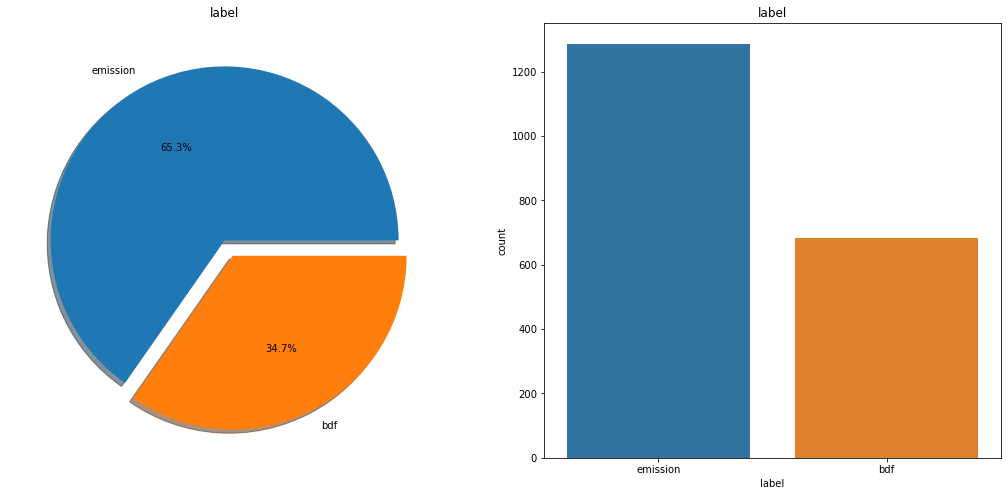

In [8]:
# Number of classes in data
f,ax=plt.subplots(1,2,figsize=(18,8))
data['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('label')
ax[0].set_ylabel('')
sns.countplot('label',data=data,ax=ax[1])
ax[1].set_title('label')
plt.show()

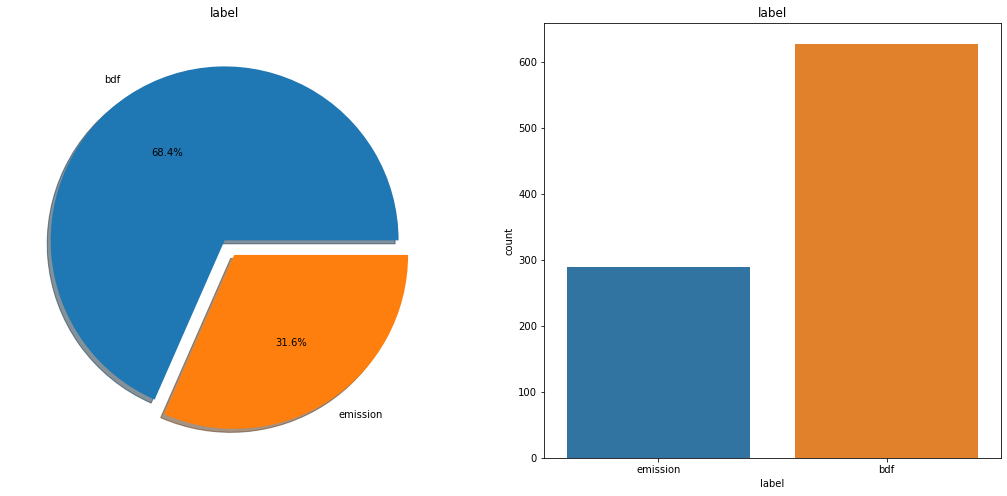

In [9]:
# number of classes in data_
f,ax=plt.subplots(1,2,figsize=(18,8))
data_['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('label')
ax[0].set_ylabel('')
sns.countplot('label',data=data_,ax=ax[1])
ax[1].set_title('label')
plt.show()

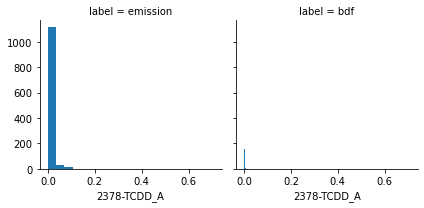

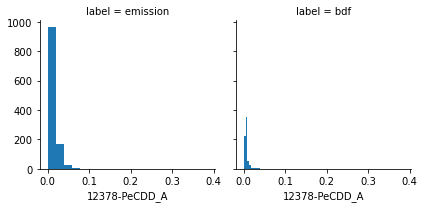

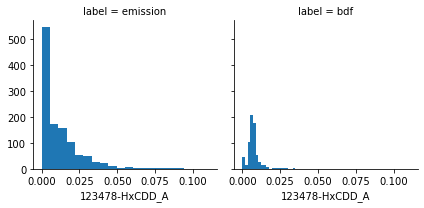

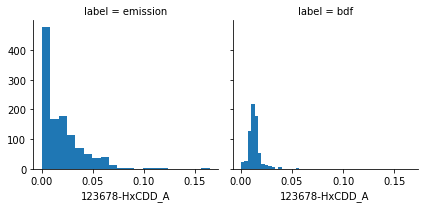

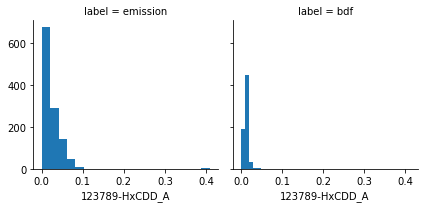

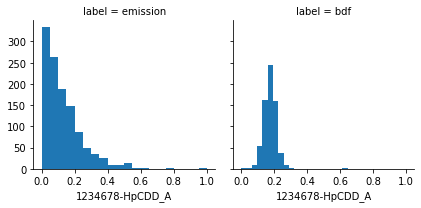

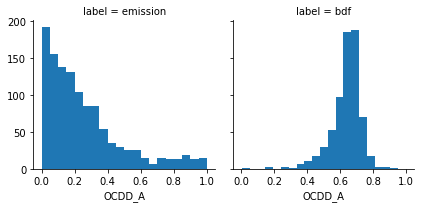

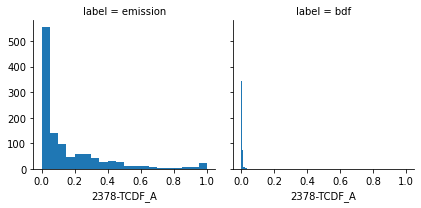

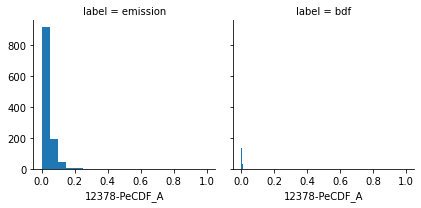

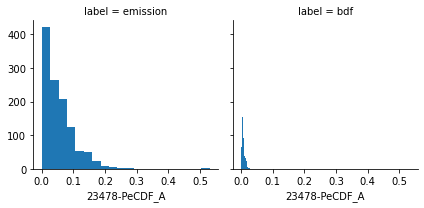

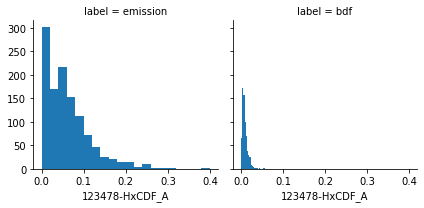

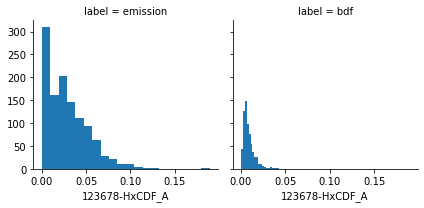

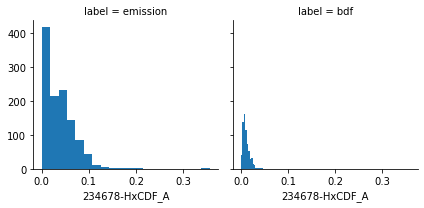

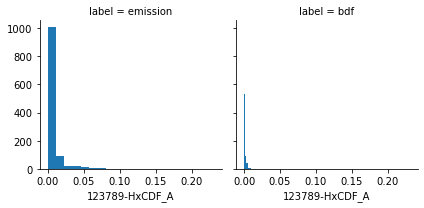

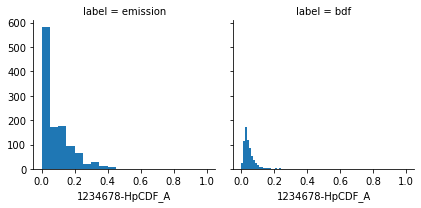

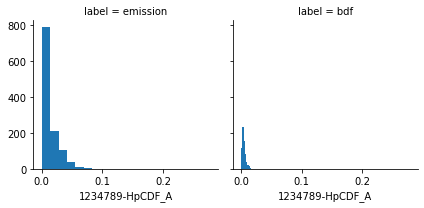

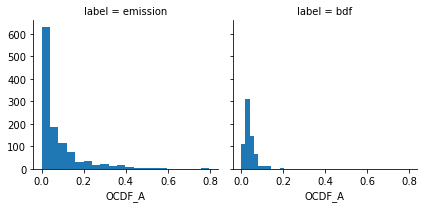

In [10]:
# A normalisation features distributions for each class for data
congenere = ['2378-TCDD_A', '12378-PeCDD_A', '123478-HxCDD_A', '123678-HxCDD_A',
       '123789-HxCDD_A', '1234678-HpCDD_A', 'OCDD_A', '2378-TCDF_A',
       '12378-PeCDF_A', '23478-PeCDF_A', '123478-HxCDF_A', '123678-HxCDF_A',
       '234678-HxCDF_A', '123789-HxCDF_A', '1234678-HpCDF_A',
       '1234789-HpCDF_A', 'OCDF_A']

for i in congenere:
    g = sns.FacetGrid(data, col='label')
    g.map(plt.hist, i, bins=20)

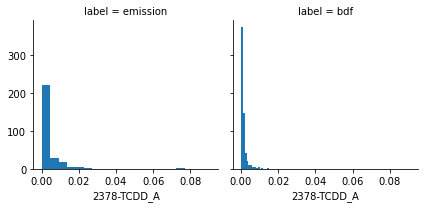

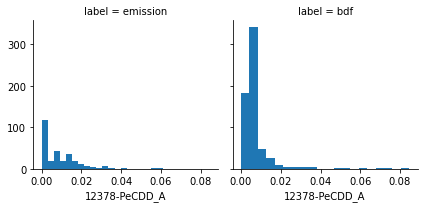

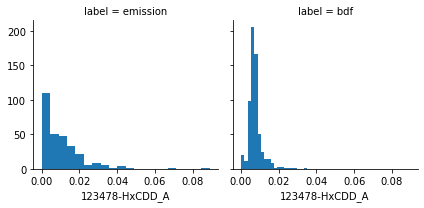

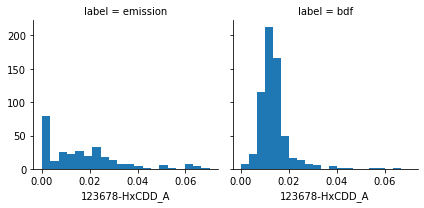

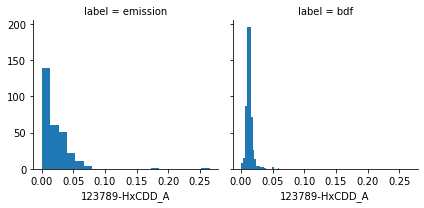

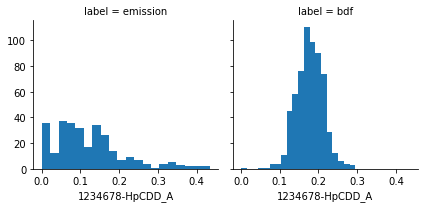

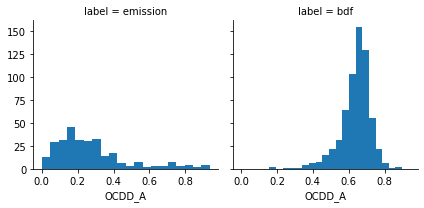

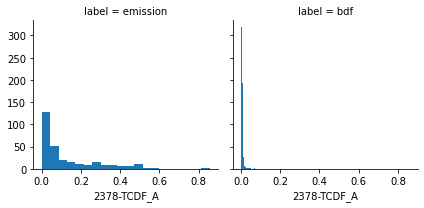

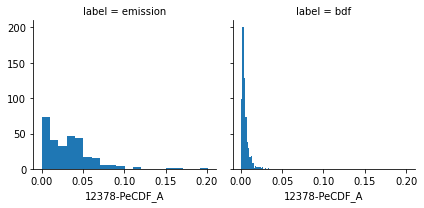

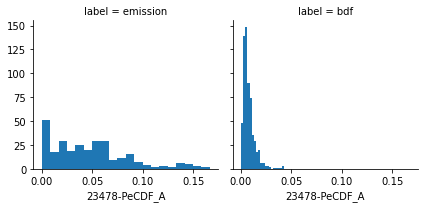

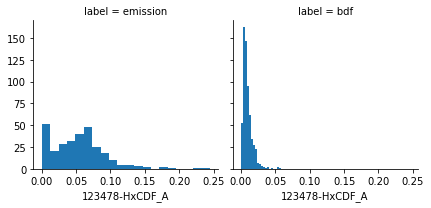

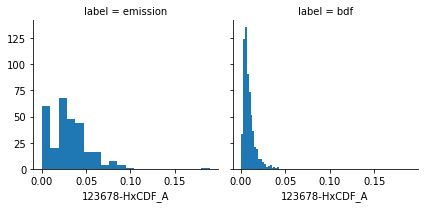

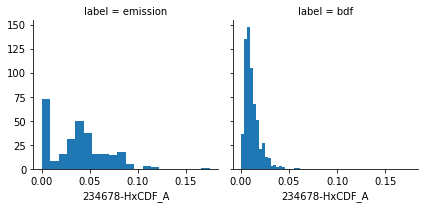

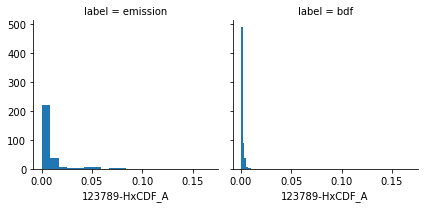

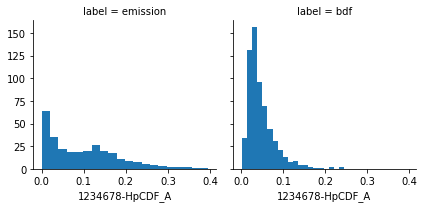

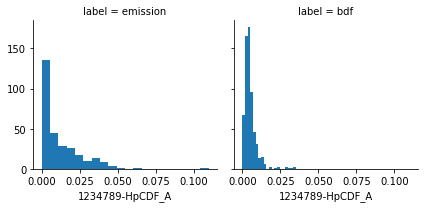

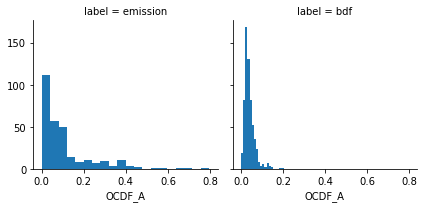

In [11]:
# A normalisation features distributions for each class for data_
congenere = ['2378-TCDD_A', '12378-PeCDD_A', '123478-HxCDD_A', '123678-HxCDD_A',
       '123789-HxCDD_A', '1234678-HpCDD_A', 'OCDD_A', '2378-TCDF_A',
       '12378-PeCDF_A', '23478-PeCDF_A', '123478-HxCDF_A', '123678-HxCDF_A',
       '234678-HxCDF_A', '123789-HxCDF_A', '1234678-HpCDF_A',
       '1234789-HpCDF_A', 'OCDF_A']

for i in congenere:
    g = sns.FacetGrid(data_, col='label')
    g.map(plt.hist, i, bins=20)

## II.c Data preparation

In [12]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [13]:
data['label'] = data['label'].map({'emission': 1, 'bdf': 0})
data_['label'] = data_['label'].map({'emission': 1, 'bdf': 0})

# III. Classification using all features (Method A and C)

In [14]:
train,test=train_test_split(data_,test_size=0.3,random_state=0,stratify=data_['label'])
train_X=train[train.columns[1:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[1:-1]]
test_Y=test[test.columns[-1:]]
X=data_[data_.columns[1:]]
Y=data_['label']

In [15]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.9420289855072463


In [16]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.9166666666666666


In [17]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.9311594202898551


In [18]:
model=DecisionTreeClassifier(max_leaf_nodes=2)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.9130434782608695


In [19]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.9637681159420289


In [20]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.9456521739130435


In [21]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.9637681159420289


In [22]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

CV Mean       Std
Linear Svm           1.000000  0.000000
Radial Svm           1.000000  0.000000
Logistic Regression  1.000000  0.000000
KNN                  1.000000  0.000000
Decision Tree        1.000000  0.000000
Naive Bayes          1.000000  0.000000
Random Forest        0.995652  0.009962

# IV. Split features of the two methods A & C

In [23]:
congeneres_C = ['2378-TCDD_C', '12378-PeCDD_C',
       '123478-HxCDD_C', '123678-HxCDD_C', '123789-HxCDD_C', '1234678-HpCDD_C',
       'OCDD_C', '2378-TCDF_C', '12378-PeCDF_C', '23478-PeCDF_C',
       '123478-HxCDF_C', '123678-HxCDF_C', '234678-HxCDF_C', '123789-HxCDF_C',
       '1234678-HpCDF_C', '1234789-HpCDF_C', 'OCDF_C']
congeneres_A = ['2378-TCDD_A', '12378-PeCDD_A', '123478-HxCDD_A', '123678-HxCDD_A',
       '123789-HxCDD_A', '1234678-HpCDD_A', 'OCDD_A', '2378-TCDF_A',
       '12378-PeCDF_A', '23478-PeCDF_A', '123478-HxCDF_A', '123678-HxCDF_A',
       '234678-HxCDF_A', '123789-HxCDF_A', '1234678-HpCDF_A',
       '1234789-HpCDF_A', 'OCDF_A']

## 1- Method A

{'emission': 1, 'bdf': 0}


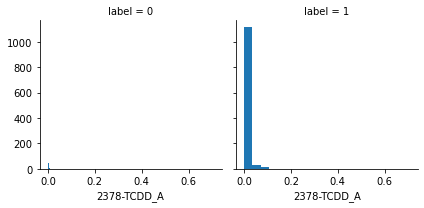

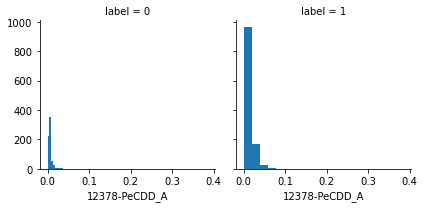

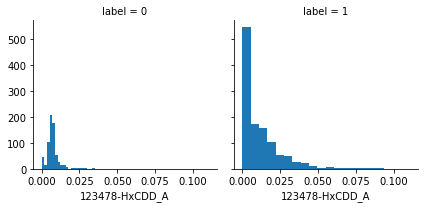

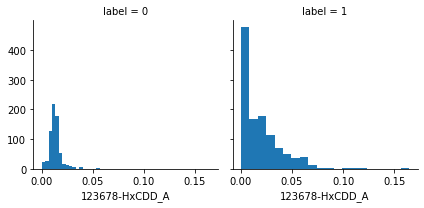

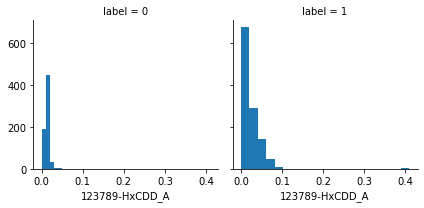

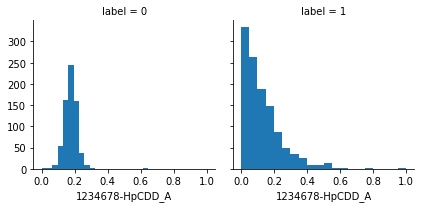

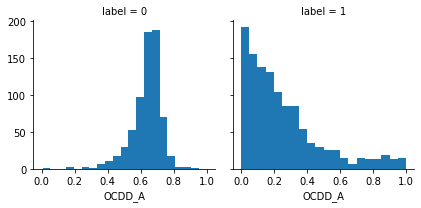

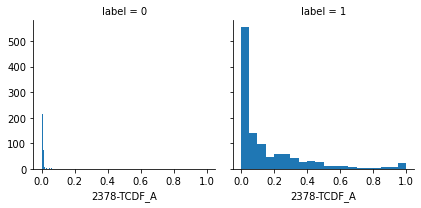

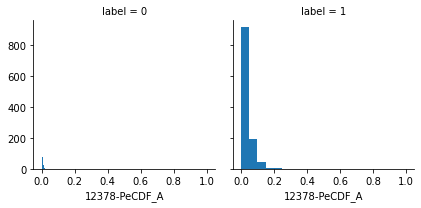

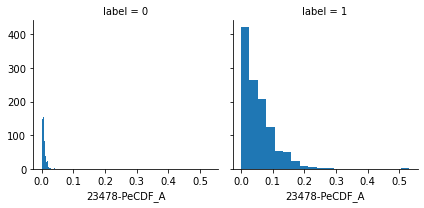

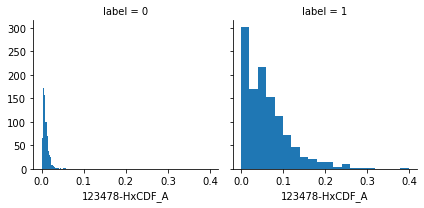

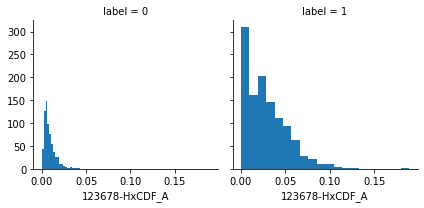

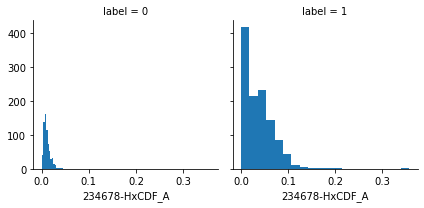

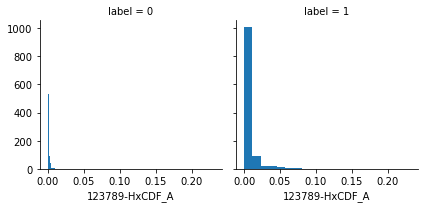

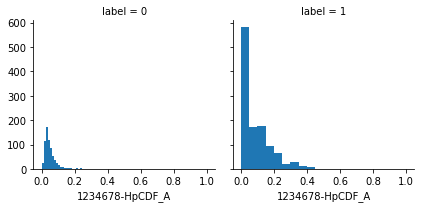

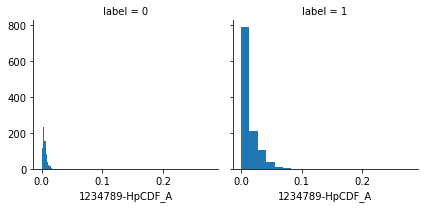

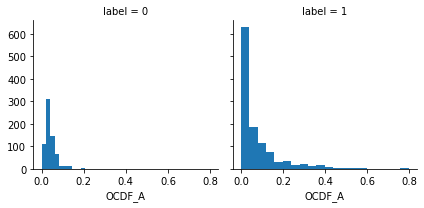

In [24]:
# use method A features and drop none values
print({'emission': 1, 'bdf': 0})
data_A = data[['id']+congeneres_A+['label']].dropna()
for i in congeneres_A:
    g = sns.FacetGrid(data_A, col='label')
    g.map(plt.hist, i, bins=20)

{'emission': 1, 'bdf': 0}


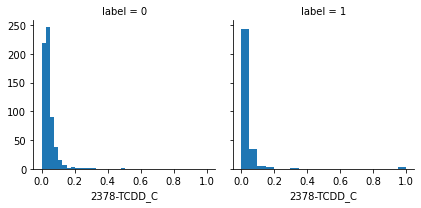

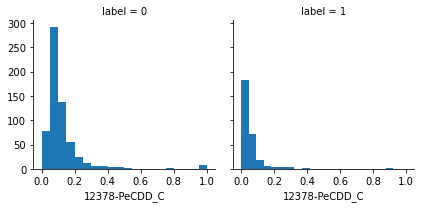

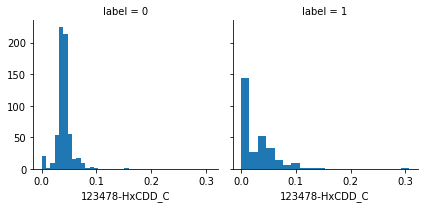

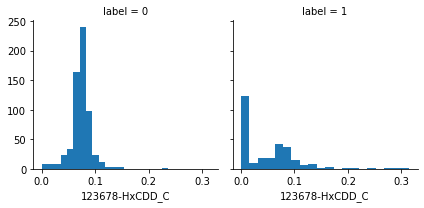

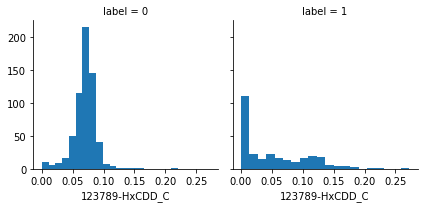

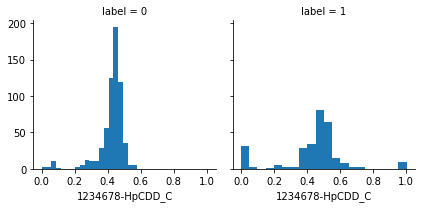

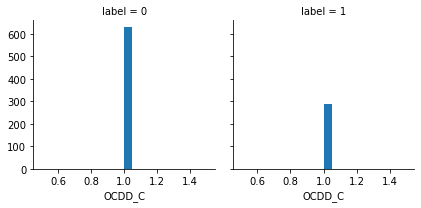

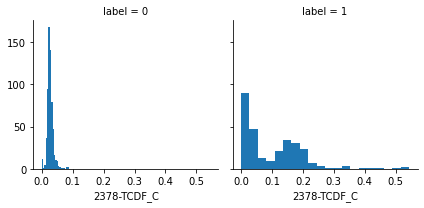

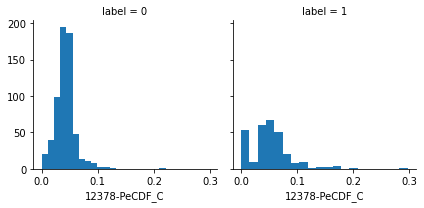

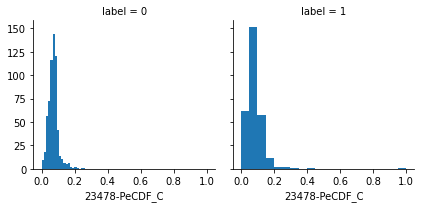

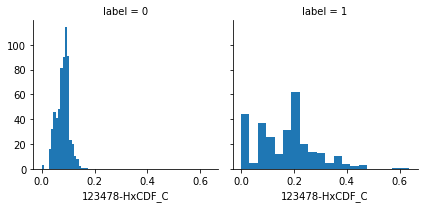

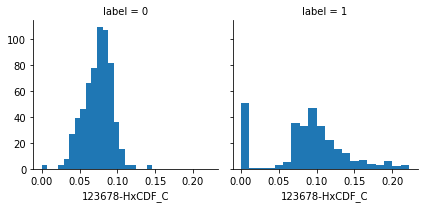

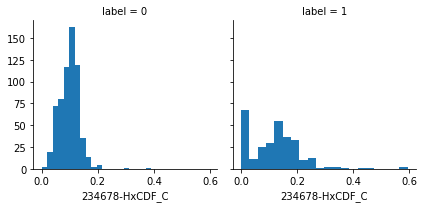

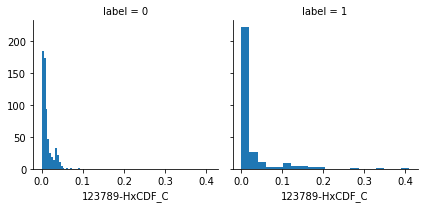

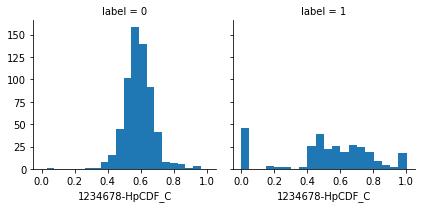

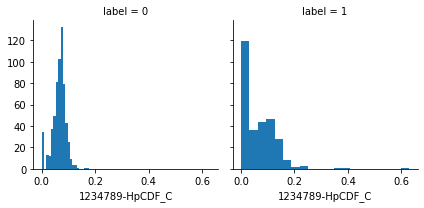

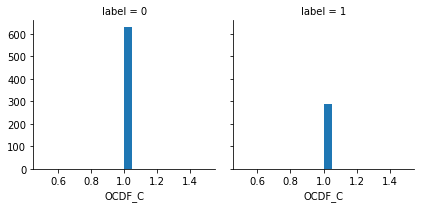

In [25]:
# use method C features and drop none values
print({'emission': 1, 'bdf': 0})
data_C = data[['id']+congeneres_C+['label']].dropna()
for i in congeneres_C:
    g = sns.FacetGrid(data_C, col='label')
    g.map(plt.hist, i, bins=20)

# V. Classification

## V.a Classification with method A features 

In [26]:
data_A = data_A.sample(len(data_A))

In [27]:
train,test=train_test_split(data_A,test_size=0.3,random_state=0,stratify=data_A['label'])
train_X=train[train.columns[1:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[1:-1]]
test_Y=test[test.columns[-1:]]
X=data_A[data_A.columns[1:]]
Y=data_A['label']

In [28]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.8884892086330936


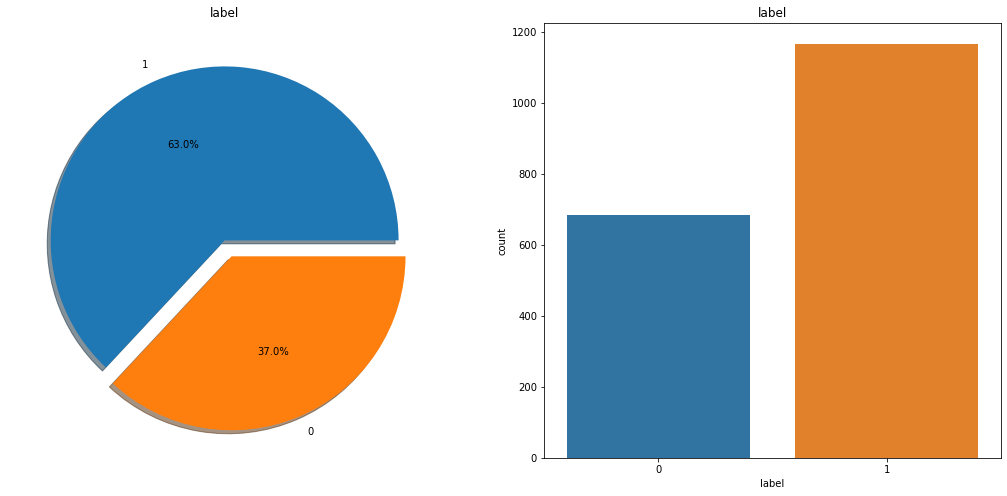

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data_A['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('label')
ax[0].set_ylabel('')
sns.countplot('label',data=data_A,ax=ax[1])
ax[1].set_title('label')
plt.show()

In [30]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.8884892086330936


In [31]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8884892086330936


In [32]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.9010791366906474


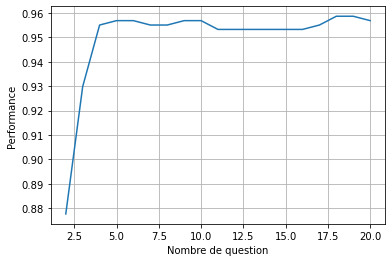

In [33]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(train_X,train_Y)
    prediction4=model.predict(test_X)
    acc.append(metrics.accuracy_score(prediction4,test_Y))
plt.plot(range(2,21), acc)
plt.xlabel("Nombre de question")
plt.ylabel("Performance")
plt.grid()

In [34]:
model=DecisionTreeClassifier(max_leaf_nodes=5)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))
print('The recall of the Decision Tree is', metrics.recall_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.9568345323741008
The recall of the Decision Tree is 0.9605633802816902


[Text(0, 0.5, 'bdf'), Text(0, 1.5, 'emission')]

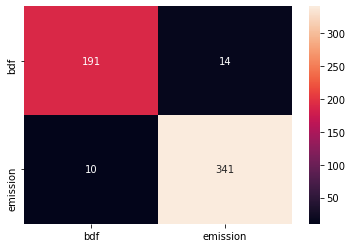

In [35]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(test_Y, prediction4),annot=True,fmt='2.0f', ax = ax)
ax.xaxis.set_ticklabels(['bdf', 'emission'])
ax.yaxis.set_ticklabels(['bdf', 'emission'])

In [36]:
test_X

2378-TCDD_A  12378-PeCDD_A  123478-HxCDD_A  123678-HxCDD_A  \
545      0.000000       0.000000        0.000000        0.000000   
576      0.000000       0.000000        0.000000        0.000000   
1501     0.000923       0.005645        0.006799        0.012751   
1069     0.001694       0.006259        0.008835        0.011045   
1751     0.000758       0.004956        0.006959        0.011874   
...           ...            ...             ...             ...   
1909     0.000985       0.006243        0.006271        0.012114   
1257     0.000000       0.000000        0.000000        0.000000   
1324     0.000964       0.004166        0.005545        0.010101   
1535     0.002416       0.005372        0.005121        0.014400   
1348     0.001034       0.005922        0.008471        0.015845   

      123789-HxCDD_A  1234678-HpCDD_A    OCDD_A  2378-TCDF_A  12378-PeCDF_A  \
545         0.000000         0.039468  0.301205     0.007790       0.018695   
576         0.000000         0.133748  0.372473     0.000000       0.000000   
1501        0.010777         0.176165  0.562092     0.003796       0.005532   
1069        0.007362         0.103084  0.072160     0.008098       0.016937   
1751        0.012169         0.199171  0.670603     0.002421       0.002991   
...              ...              ...       ...          ...            ...   
1909        0.010250         0.148274  0.596128     0.006368       0.006728   
1257        0.032702         0.120482  0.378657     0.086059       0.000000   
1324        0.010101         0.150250  0.602514     0.010367       0.004855   
1535        0.012949         0.168042  0.583778     0.007655       0.007019   
1348        0.013956         0.174958  0.566577     0.014501       0.010280   

      23478-PeCDF_A  123478-HxCDF_A  123678-HxCDF_A  234678-HxCDF_A  \
545        0.018695        0.041545        0.042584        0.039468   
576        0.202177        0.059098        0.034215        0.018663   
1501       0.009906        0.016296        0.014334        0.020233   
1069       0.027245        0.042705        0.058169        0.041232   
1751       0.005103        0.005654        0.005319        0.006949   
...             ...             ...             ...             ...   
1909       0.009484        0.013972        0.013478        0.016087   
1257       0.032702        0.111876        0.018072        0.029260   
1324       0.009629        0.011758        0.010205        0.016167   
1535       0.010745        0.012407        0.012486        0.018125   
1348       0.021491        0.016088        0.013914        0.018281   

      123789-HxCDF_A  1234678-HpCDF_A  1234789-HpCDF_A    OCDF_A  
545         0.009659         0.311591         0.023889  0.145409  
576         0.000000         0.101866         0.014774  0.062986  
1501        0.002209         0.092695         0.010788  0.049060  
1069        0.004640         0.154624         0.045651  0.390261  
1751        0.000480         0.032053         0.003759  0.028783  
...              ...              ...              ...       ...  
1909        0.002515         0.093263         0.009834  0.048007  
1257        0.000000         0.137694         0.011188  0.041308  
1324        0.003411         0.066770         0.008581  0.074616  
1535        0.000980         0.062108         0.009600  0.066798  
1348        0.005493         0.061398         0.007794  0.043998  

[556 rows x 17 columns]

In [37]:
for i,j in enumerate(train_X.columns):
    print(i, j)

0 2378-TCDD_A
1 12378-PeCDD_A
2 123478-HxCDD_A
3 123678-HxCDD_A
4 123789-HxCDD_A
5 1234678-HpCDD_A
6 OCDD_A
7 2378-TCDF_A
8 12378-PeCDF_A
9 23478-PeCDF_A
10 123478-HxCDF_A
11 123678-HxCDF_A
12 234678-HxCDF_A
13 123789-HxCDF_A
14 1234678-HpCDF_A
15 1234789-HpCDF_A
16 OCDF_A


In [38]:
list(train_X.columns)

['2378-TCDD_A',
 '12378-PeCDD_A',
 '123478-HxCDD_A',
 '123678-HxCDD_A',
 '123789-HxCDD_A',
 '1234678-HpCDD_A',
 'OCDD_A',
 '2378-TCDF_A',
 '12378-PeCDF_A',
 '23478-PeCDF_A',
 '123478-HxCDF_A',
 '123678-HxCDF_A',
 '234678-HxCDF_A',
 '123789-HxCDF_A',
 '1234678-HpCDF_A',
 '1234789-HpCDF_A',
 'OCDF_A']

In [39]:
data_A

id  2378-TCDD_A  \
1710                                   Lake Scott, KS_8     0.001728   
388            HWI_97/CK/CKMOHOL.XLS_1992-07-01_204C3R1     0.007022   
1508                               Dixon Springs, IL_16     0.001360   
1134                 MWI-LAST/MWIVTSAF.XLS_1994-05-11_1     0.008564   
1529                                   Everglades, FL_4     0.002345   
...                                                 ...          ...   
1326                               Bay St. Louis, MS_18     0.000700   
396            HWI_97/CK/CKMOHOL.XLS_1994-07-18_204C6R3     0.000638   
403           HWI_97/CK/CKMOLONE.XLS_1993-10-31_303C5R1     0.000000   
39         CK-NHW/CKMDLEH.XLS_1995-10-24_Cond. 2, Run 2     0.000000   
831   MSW-LAST/MB-WW/MSWNYONO.XLS_1995-02-01_Unit 1,...     0.000000   

      12378-PeCDD_A  123478-HxCDD_A  123678-HxCDD_A  123789-HxCDD_A  \
1710       0.006254        0.000000        0.013543        0.010722   
388        0.039738        0.073690        0.046876        0.058450   
1508       0.006738        0.006834        0.011395        0.011732   
1134       0.015810        0.017787        0.033597        0.030962   
1529       0.003928        0.003602        0.007954        0.007345   
...             ...             ...             ...             ...   
1326       0.004458        0.006559        0.012940        0.011539   
396        0.017627        0.024701        0.030848        0.055549   
403        0.000000        0.000000        0.000000        0.000000   
39         0.003769        0.011308        0.011308        0.011308   
831        0.003005        0.006764        0.015361        0.024119   

      1234678-HpCDD_A    OCDD_A  2378-TCDF_A  12378-PeCDF_A  23478-PeCDF_A  \
1710         0.164236  0.692338     0.002450       0.003922       0.005823   
388          0.176122  0.010938     0.439823       0.033951       0.073690   
1508         0.178262  0.743641     0.000869       0.000870       0.001588   
1134         0.019104  0.191041     0.144928       0.034256       0.072464   
1529         0.156967  0.698639     0.006693       0.004816       0.006571   
...               ...       ...          ...            ...            ...   
1326         0.213532  0.659950     0.002885       0.002720       0.004542   
396          0.157486  0.071031     0.030848       0.049403       0.104952   
403          0.000000  0.000000     0.833333       0.000000       0.000000   
39           0.169619  0.047116     0.621937       0.000000       0.082925   
831          0.157648  0.545704     0.000000       0.000000       0.012410   

      123478-HxCDF_A  123678-HxCDF_A  234678-HxCDF_A  123789-HxCDF_A  \
1710        0.008546        0.007539        0.011087        0.000000   
388         0.022570        0.010089        0.000000        0.006250   
1508        0.002482        0.002699        0.003096        0.000245   
1134        0.092227        0.054018        0.092227        0.000000   
1529        0.007153        0.006941        0.010362        0.000000   
...              ...             ...             ...             ...   
1326        0.005755        0.005565        0.007560        0.001091   
396         0.117303        0.067900        0.169836        0.023136   
403         0.166667        0.000000        0.000000        0.000000   
39          0.022616        0.011308        0.000000        0.000000   
831         0.035707        0.011278        0.027487        0.001886   

      1234678-HpCDF_A  1234789-HpCDF_A    OCDF_A  label  
1710         0.043766         0.005184  0.022862      0  
388          0.000791         0.000000  0.000000      1  
1508         0.017053         0.001529  0.009607      0  
1134         0.144928         0.019104  0.028986      1  
1529         0.048144         0.005483  0.023057      0  
...               ...              ...       ...    ...  
1326         0.035758         0.003863  0.020582      0  
396          0.046330         0.026267  0.006146      1  
403        

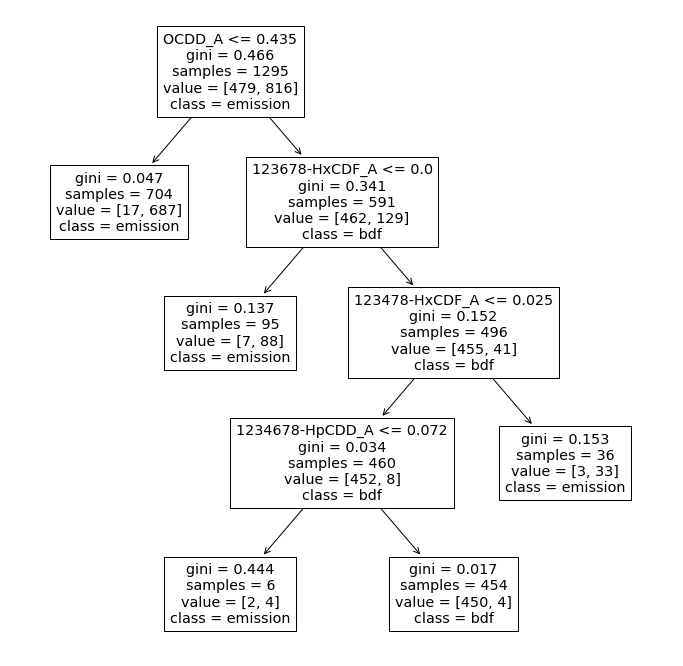

In [40]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
_=tree.plot_tree(model, feature_names=list(train_X.columns), class_names=['bdf', 'emission'])

In [41]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.9784172661870504


In [42]:
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=5, random_state=0) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
#     print("Accuracy from each of 5 folds: ", cv_result)
#     print("Mean Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (cv_result.mean()*100.0, cv_result.std()*100.0))
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

CV Mean  Std
Linear Svm               1.0  0.0
Radial Svm               1.0  0.0
Logistic Regression      1.0  0.0
KNN                      1.0  0.0
Decision Tree            1.0  0.0
Naive Bayes              1.0  0.0
Random Forest            1.0  0.0

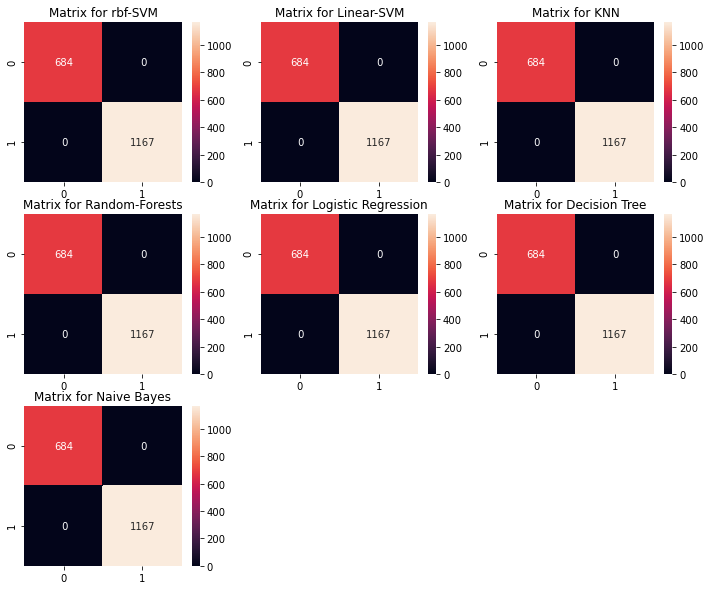

In [43]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
f.delaxes(ax[2,1])
f.delaxes(ax[2,2])
plt.show()

## V.b Classification with method C features

In [44]:
data_C = data_C.sample(len(data_C))

In [45]:
train,test=train_test_split(data_C,test_size=0.3,random_state=0,stratify=data_C['label'])
train_X=train[train.columns[1:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[1:-1]]
test_Y=test[test.columns[-1:]]
X=data_C[data_C.columns[1:]]
Y=data_C['label']

In [46]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.7753623188405797


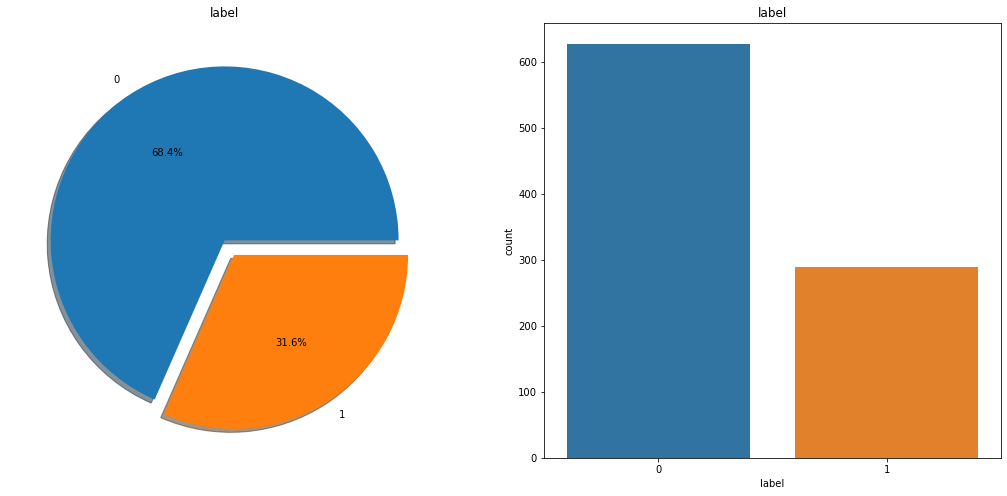

In [47]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data_C['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('label')
ax[0].set_ylabel('')
sns.countplot('label',data=data_C,ax=ax[1])
ax[1].set_title('label')
plt.show()

In [48]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.7753623188405797


In [49]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8260869565217391


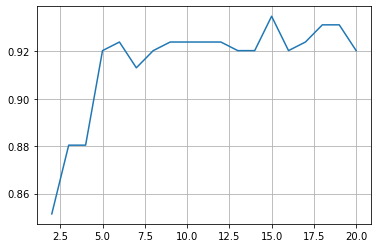

In [50]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(train_X,train_Y)
    prediction4=model.predict(test_X)
    acc.append(metrics.accuracy_score(prediction4,test_Y))
plt.plot(range(2,21), acc)
plt.grid()

In [51]:
model=DecisionTreeClassifier(max_leaf_nodes=5)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.9202898550724637


In [52]:
for i,j in enumerate(train_X.columns):
    print(i, j)

0 2378-TCDD_C
1 12378-PeCDD_C
2 123478-HxCDD_C
3 123678-HxCDD_C
4 123789-HxCDD_C
5 1234678-HpCDD_C
6 OCDD_C
7 2378-TCDF_C
8 12378-PeCDF_C
9 23478-PeCDF_C
10 123478-HxCDF_C
11 123678-HxCDF_C
12 234678-HxCDF_C
13 123789-HxCDF_C
14 1234678-HpCDF_C
15 1234789-HpCDF_C
16 OCDF_C


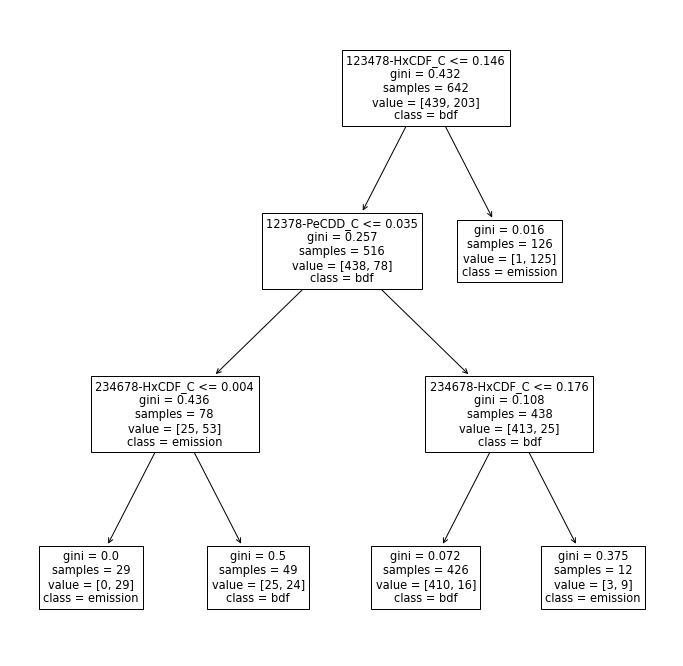

In [53]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
_=tree.plot_tree(model, feature_names=list(train_X.columns), class_names=['bdf', 'emission'])

In [54]:
np.mean(train_X)

2378-TCDD_C        0.038187
12378-PeCDD_C      0.095918
123478-HxCDD_C     0.036409
123678-HxCDD_C     0.065454
123789-HxCDD_C     0.064644
1234678-HpCDD_C    0.429314
OCDD_C             1.000000
2378-TCDF_C        0.050216
12378-PeCDF_C      0.046006
23478-PeCDF_C      0.076427
123478-HxCDF_C     0.108771
123678-HxCDF_C     0.078835
234678-HxCDF_C     0.104192
123789-HxCDF_C     0.016768
1234678-HpCDF_C    0.566421
1234789-HpCDF_C    0.066903
OCDF_C             1.000000
dtype: float64

In [55]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.9565217391304348


In [56]:
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=5, random_state=0) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

CV Mean  Std
Linear Svm               1.0  0.0
Radial Svm               1.0  0.0
Logistic Regression      1.0  0.0
KNN                      1.0  0.0
Decision Tree            1.0  0.0
Naive Bayes              1.0  0.0
Random Forest            1.0  0.0

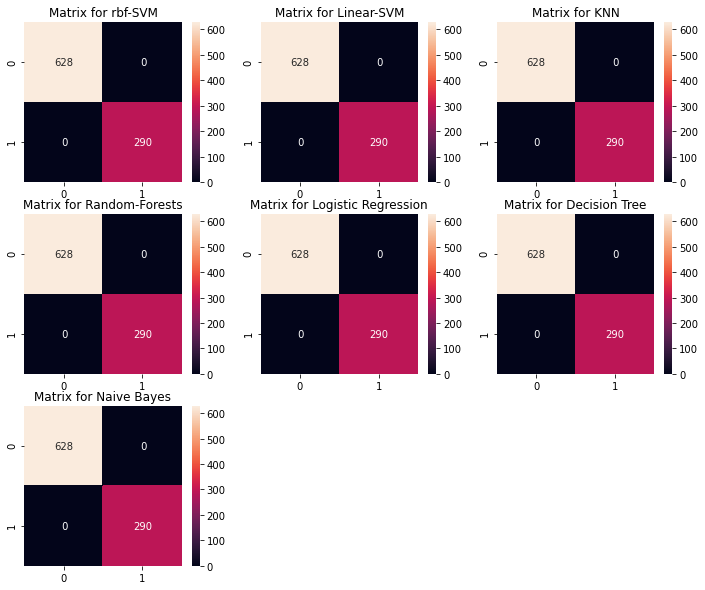

In [57]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
f.delaxes(ax[2,1])
f.delaxes(ax[2,2])
plt.show()

## V.c Classification with method A and C features

In [58]:
data_AC = data.copy()
data_AC = data_AC.dropna()

In [59]:
train,test=train_test_split(data_AC,test_size=0.3,random_state=0,stratify=data_AC['label'])
train_X=train[train.columns[1:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[1:-1]]
test_Y=test[test.columns[-1:]]
X=data_AC[data_C.columns[1:]]
Y=data_AC['label']

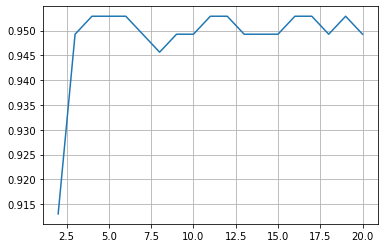

In [60]:
acc=[]
for i in range(2,21):
    model=DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(train_X,train_Y)
    prediction4=model.predict(test_X)
    acc.append(metrics.accuracy_score(prediction4,test_Y))
plt.plot(range(2,21), acc)
plt.grid()

The accuracy of the Decision Tree is 0.9528985507246377


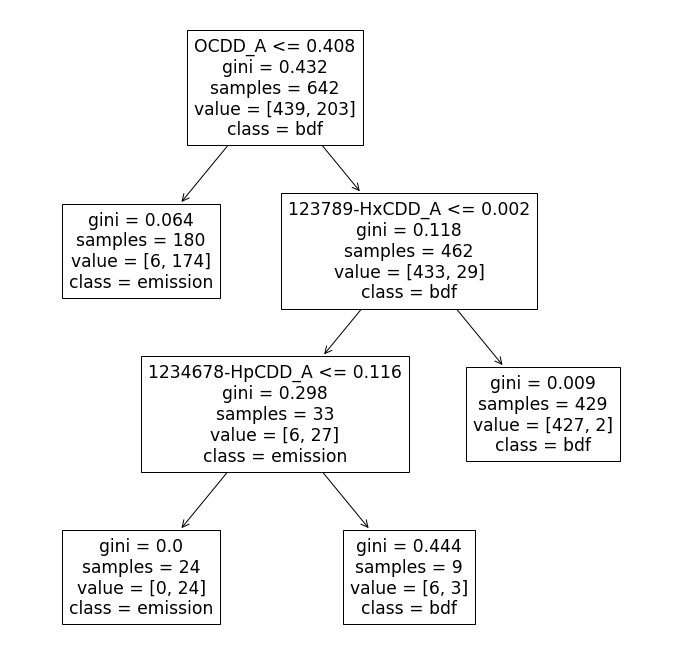

In [61]:
from sklearn import tree

model=DecisionTreeClassifier(max_leaf_nodes=4)
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

fig, ax = plt.subplots(figsize=(12, 12))
_=tree.plot_tree(model, feature_names=list(train_X.columns), class_names=['bdf', 'emission'])

In [63]:
for i,j in enumerate(train_X.columns):
    print(i, j)

0 2378-TCDD_A
1 12378-PeCDD_A
2 123478-HxCDD_A
3 123678-HxCDD_A
4 123789-HxCDD_A
5 1234678-HpCDD_A
6 OCDD_A
7 2378-TCDF_A
8 12378-PeCDF_A
9 23478-PeCDF_A
10 123478-HxCDF_A
11 123678-HxCDF_A
12 234678-HxCDF_A
13 123789-HxCDF_A
14 1234678-HpCDF_A
15 1234789-HpCDF_A
16 OCDF_A
17 2378-TCDD_C
18 12378-PeCDD_C
19 123478-HxCDD_C
20 123678-HxCDD_C
21 123789-HxCDD_C
22 1234678-HpCDD_C
23 OCDD_C
24 2378-TCDF_C
25 12378-PeCDF_C
26 23478-PeCDF_C
27 123478-HxCDF_C
28 123678-HxCDF_C
29 234678-HxCDF_C
30 123789-HxCDF_C
31 1234678-HpCDF_C
32 1234789-HpCDF_C
33 OCDF_C
